In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

### 1. Data Import and Exploration 

In [2]:
# Read the .h5 file and assign to a variable.

filePath = '/content/drive/MyDrive/greatlearning/NNDL Project 2/SVHN_single_grey1.h5'

file = h5py.File(filePath, 'r')

In [3]:
# Print all the keys from the .h5 file

file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
# Split the data into X_train, X_test, Y_train, Y_test 

X_train = np.array(file.get('X_train'))
X_test = np.array(file.get('X_test'))

y_train = np.array(file.get('y_train'))
y_test = np.array(file.get('y_test'))

### Data Visualisation and preprocessing 

In [5]:
# Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


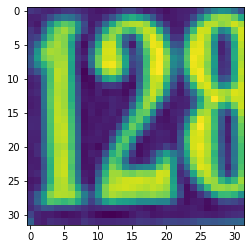

In [6]:
# Visualise first 10 images in train data and print its corresponding labels.

plt.imshow(X_train[0])

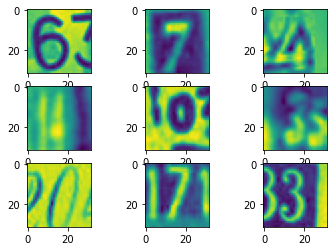

In [7]:
for i in range(1, 10):
  plt.subplot(330 + i)
  plt.imshow(X_train[i])

plt.show()

In [8]:
# Reshape all the images with appropriate shape update the data in same variable.

X_train[0].shape

(32, 32)

There is no need to reshape the data (32, 32) data will be fed into the first flatten layer in the neural network. 

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
X_train[0].dtype

dtype('float32')

In [11]:
# Normalise the images

X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
X_train.shape

(42000, 32, 32)

In [13]:
# Transform Labels into format acceptable by Neural Network

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [14]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [15]:
y_train[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [16]:
# Print total Number of classes in the Dataset.

total_classes = y_train.shape[1]
total_classes

10

### Model Training & Evaluation using Neural Network

In [17]:
# Design a Neural Network to train a classifier.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1024, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(total_classes, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2

In [19]:
# Evaluate performance of the model with appropriate metrics.

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

In [20]:

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('SVHN_best_model.h5', save_best_only=True, 
                                                      monitor='val_accuracy', mode='max', verbose=1)

In [21]:
# Train the classifier using previously designed Architecture

epochs = 200
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[model_checkpoint])

Epoch 1/200
1309/1313 [============================>.] - ETA: 0s - loss: 1.3032 - accuracy: 0.5748
Epoch 1: val_accuracy improved from -inf to 0.72839, saving model to SVHN_best_model.h5
1313/1313 [==============================] - 19s 13ms/step - loss: 1.3025 - accuracy: 0.5750 - val_loss: 0.8923 - val_accuracy: 0.7284
Epoch 2/200
1308/1313 [============================>.] - ETA: 0s - loss: 0.9132 - accuracy: 0.7094
Epoch 2: val_accuracy improved from 0.72839 to 0.77600, saving model to SVHN_best_model.h5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.9128 - accuracy: 0.7095 - val_loss: 0.7272 - val_accuracy: 0.7760
Epoch 3/200
1310/1313 [============================>.] - ETA: 0s - loss: 0.7802 - accuracy: 0.7539
Epoch 3: val_accuracy improved from 0.77600 to 0.78872, saving model to SVHN_best_model.h5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.7803 - accuracy: 0.7539 - val_loss: 0.6813 - val_accuracy: 0.7887
Epoch 4/200
1308/1313 [=======

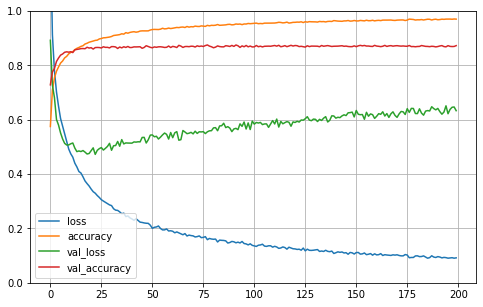

In [23]:
# Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot
# write your observations on the same.

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 78/200
1311/1313 [============================>.] - ETA: 0s - loss: 0.1585 - accuracy: 0.9472
Epoch 78: val_accuracy improved from 0.87367 to 0.87511, saving model to SVHN_best_model.h5
1313/1313 [==============================] - 12s 9ms/step - loss: 0.1586 - accuracy: 0.9472 - val_loss: 0.5556 - val_accuracy: 0.8751

The best model was found at epoch 78 with 94% training accuracy and 87% testing accuracy.

There is a little bit overfitting but not extreme overfitting. 
The accuracy curve started to expand more and more after 25 epochs. which indicates the starting of overfitting.

Improvement of training loss and no improvement in validation loss in the later stages of training indicates overfitting.

Most of the learning happened in first 20 epochs.